# Modelo Support Vector Machine
 Liceth Mosquera

## Librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

from scipy import interp


from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn import metrics,model_selection,svm
from sklearn.metrics import roc_curve, roc_auc_score,auc,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,precision_recall_fscore_support,precision_recall_curve,confusion_matrix
from scipy import interp
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV # Grid Search

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC# prepare configuration for cross validation test harness
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC# prepare configuration for cross validation test harness

### Explorando los datos

In [2]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')
df1 = Data.dropna(axis=0,how='any')
Y = df1['Class']
X = df1.drop('Class', axis = 1)
df1.groupby('Class').size()

Class
-1    1111
 0    2001
 1     963
dtype: int64

###  1. Error real deseado $\epsilon$  y 2. Error de entrenamiento deseado $\delta$ .Parametros

In [3]:
Epsilon = 0.2 #error real
delta = 0.1  #error de entrenamiento
h_aprox= len(list(df1))

## 3. Garantia probable de aprendizaje

In [4]:
n_est = int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
n_est

33

## 4. Tamaño óptimo de la muestra

Igual al tamaño de la garantía probable de apredizaje

In [5]:
classifier = svm.SVC(kernel="rbf",gamma='scale')
classifier.fit(X,np.ravel(Y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Modelo 2 separando 70% para entrenamiento

## 5. Dividir el conjunto de muestra en: entrenamiento, validación y prueba.

Dividiendo las clases

In [6]:
# Binarize the output
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]
n_classes
X.shape[1]

67

In [7]:
Xb_tr, X2_o, Yb_tr, y2_o = train_test_split(X, y,test_size=0.4,random_state=19)
Xb_va2, Xb_test2, Yb_va2, Yb_test2 = train_test_split(X2_o, y2_o, test_size=0.5, train_size = 0.5, random_state=19)  

## 8.	Entrenar el modelo con los datos en altas dimensiones (espacio original)
SVM con Kernel rbf

In [8]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',gamma='scale') # Linear Kernel

In [9]:
clf = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma='scale', probability=True))
y_score = clf.fit(Xb_tr, Yb_tr).decision_function(X2_o)
y_pred = clf.predict(X2_o)
Y_proba = clf.predict_proba(X2_o)
score=clf.score(X2_o, y_pred)

https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
Conf_Mat = multilabel_confusion_matrix(y_test,Y_pred,labels=[-1,0,1])

https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

In [10]:
print ('Accuracy:', accuracy_score(y2_o, y_pred))
print ('F1 score:', f1_score(y2_o, y_pred, average='macro'))
print ('Recall:', recall_score(y2_o, y_pred, average='macro'))
print ('Precision:', precision_score(y2_o, y_pred, average='macro'))
print ('\n clasification report:\n', classification_report(y2_o,y_pred))

Accuracy: 0.3177914110429448
F1 score: 0.24005614642098227
Recall: 0.21862871799442454
Precision: 0.44241108354011577

 clasification report:
               precision    recall  f1-score   support

           0       0.65      0.04      0.08       413
           1       0.67      0.61      0.64       815
           2       0.00      0.00      0.00       402

   micro avg       0.67      0.32      0.43      1630
   macro avg       0.44      0.22      0.24      1630
weighted avg       0.50      0.32      0.34      1630
 samples avg       0.32      0.32      0.32      1630



C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 

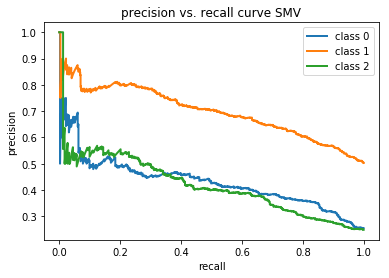

In [11]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y2_o[:, i],y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve SMV")
plt.show()

https://www.programcreek.com/python/example/94869/sklearn.multiclass.OneVsRestClassifier

In [12]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_o[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y2_o.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

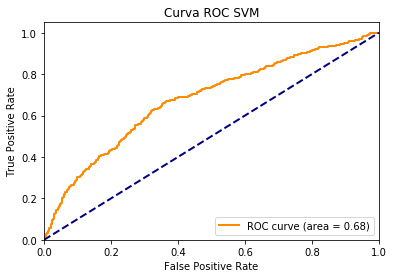

In [13]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC SVM')
plt.legend(loc="lower right")
plt.show()

## Graficar ROC por clases

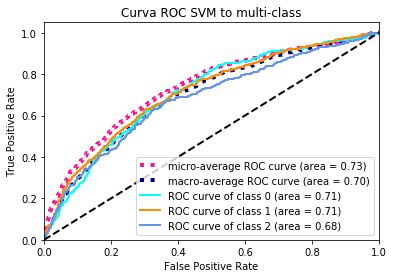

In [14]:
#Compute macro-average ROC curve and ROC area

# Primero agregamos la tasa de todos los falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#despues interpolamos todas las curvas ROC en este punto
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finalmente lo promediamos y computamos AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC SVM to multi-class')
plt.legend(loc="lower right")
plt.show()

# Iterando la cantidad de datos

https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/ quitar vf
https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
https://www.coursera.org/lecture/clasificacion-imagenes/support-vector-machines-svm-cuestiones-practicas-d8ECB

In [15]:
step=10
Pred=[np.zeros(len(X))]
Prob=np.zeros(int((len(X)*0.6)/step))
Conf_Mat= np.zeros((int((len(X)*0.6)/step),3,3))
accur=np.zeros(int((len(X)*0.6)/step))

R_rta=pd.DataFrame(accur,Conf_Mat)
R_rta.all()

num=list(range(len(accur)))
n=n_est
N=range(n,round(len(X)*0.6),step)
#Conf_Mat
precision = dict()
recall = dict()
average_precision = dict()

In [16]:
(len(X)*0.6)/step

244.5

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

https://www.kaggle.com/s7uff3r/multiple-classifiers-accuracy-tests-roc-curves

Prueba aumentando la muestra

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=109) # 60% training and 40% test

In [18]:
clf = svm.SVC(kernel='linear')
# Train classifier 
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
clf =svm.SVC(kernel='linear')#,gamma='scale' decision_function_shape='ovr' LinearSVC(random_state=0, tol=1e-5,multi_class='ovr')

n_svm = np.ndarray((len(N),1))#el 1 se cambia por la cantidad de datos en el arreglo

for i in range(len(N)):
    Xb_tr, Xb_o, Yb_tr, Yb_o = train_test_split(x_train,y_train ,test_size=((N[i]/X.shape[0])*0.3/0.7)
                                                ,train_size=N[i]/X.shape[0],random_state=19)  
    #Xb_va, Xb_ts, Yb_va, Yb_ts = train_test_split(Xb_o, Yb_o, test_size=0.5, train_size = 0.5, random_state=19)
    
    #porbando el modelo
    y_score = clf.fit(Xb_tr, Yb_tr).decision_function(x_test)
    y_pred2= clf.predict(x_test)
   # Pred= score(clf,Xb_o, y_score)
    n_svm[i]=(clf.score(x_test, y_test)) #  n_svm[i,:]

In [20]:
max(n_svm)

array([0.51349693])

In [21]:
n_bst = np.where(n_svm == np.amax(n_svm))[0]
n_bst

array([69, 80], dtype=int64)

In [22]:
a = []
for i in range(0,242): #len(N)-1
    i=n+i*step
    a.append(i)
#print(a)

Text(0.5, 0, 'Cantidad datos')

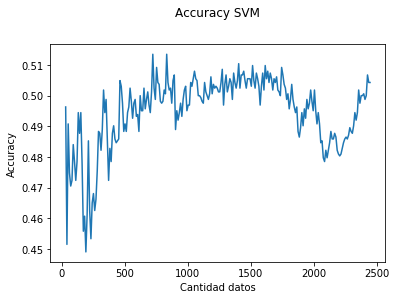

In [23]:
plt.plot(a,n_svm)
plt.title('Accuracy SVM', y=1.1)
plt.ylabel('Accuracy')
plt.xlabel('Cantidad datos')

In [24]:
M_N=n+n_bst[0]*step

In [25]:
n_bst
print('El tamaño de los datos para entrenar con el que se obtiene el mejor modelo es {0}'.format(M_N))


El tamaño de los datos para entrenar con el que se obtiene el mejor modelo es 723


In [26]:
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
clf_grid.fit(Xb_tr, Yb_tr)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   10.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

# Matriz de confusión

https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py
   ROC para todos los modelos

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=109) # 60% training and 40% test

In [28]:
smv=SVC(kernel='linear').fit(x_train, y_train)
smv_predicted=smv.predict( x_test)
confusion_mc=confusion_matrix(y_test,smv_predicted)
df_cm=pd.DataFrame(confusion_mc)

Text(0.5, 15.0, 'Predicted label')

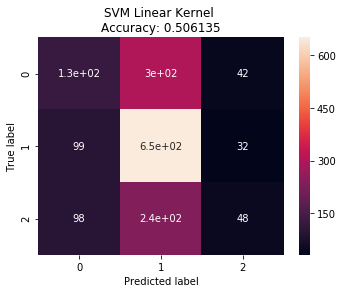

In [29]:
import seaborn as sns
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,annot=True)
plt.title('SVM Linear Kernel \nAccuracy: {0:3f}'.format(accuracy_score(y_test,smv_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [30]:
smv_rbf=SVC(kernel='rbf').fit(x_train, y_train)
smv_predicted_rbf=smv.predict( x_test)
confusion_mc_rbf=confusion_matrix(y_test,smv_predicted_rbf)
df_cm_rbf=pd.DataFrame(confusion_mc_rbf)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted label')

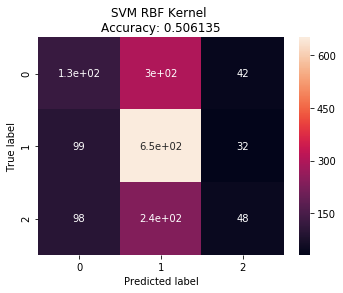

In [31]:
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm_rbf,annot=True)
plt.title('SVM RBF Kernel \nAccuracy: {0:3f}'.format(accuracy_score(y_test,smv_predicted_rbf)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [32]:
print(classification_report(y_test,smv_predicted_rbf))

              precision    recall  f1-score   support

          -1       0.39      0.27      0.32       466
           0       0.55      0.83      0.66       782
           1       0.39      0.13      0.19       382

    accuracy                           0.51      1630
   macro avg       0.44      0.41      0.39      1630
weighted avg       0.47      0.51      0.45      1630



In [33]:
print('Micro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted,average='micro')))
print('Macro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted,average='macro')))
print('Micro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted_rbf,average='micro')))
print('Macro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted_rbf,average='macro')))

Micro-averaged precision _lineal=0.51 (treat instances equally)
Macro-averaged precision _lineal=0.44 (treat instances equally)
Micro-averaged precision RBF=0.51 (treat instances equally)
Macro-averaged precision RBF=0.44 (treat instances equally)


In [34]:
print('Micro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted,average='micro')))
print('Macro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted,average='macro')))
print('Micro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted_rbf,average='micro')))
print('Macro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted_rbf,average='macro')))

Micro-averaged precision _lineal=0.51 (treat instances equally)
Macro-averaged precision _lineal=0.39 (treat instances equally)
Micro-averaged precision RBF=0.51 (treat instances equally)
Macro-averaged precision RBF=0.39 (treat instances equally)


In [35]:
print('Cross-Validation (accuracy)', cross_val_score(smv,x_train,y_train,cv=5))
#print('Cross-Validation (AUC)', cross_val_score(smv,x_train,y_train,cv=skf,scoring='roc_auc'))
#print('Cross-Validation (Recall)', cross_val_score(smv,x_train,y_train,cv=5,scoring='recall'))

Cross-Validation (accuracy) [0.53265306 0.52965235 0.54192229 0.54396728 0.55122951]
